In [1]:
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from importlib import reload
import numpy as np

In [2]:
df = pd.read_hdf('data_regret.h5')
df = df.transpose()
df1 = df.cumsum()
df1

Run,chocolate-sweep-120,jumping-sweep-119,pleasant-sweep-118,still-sweep-117,volcanic-sweep-116,dashing-sweep-115,vocal-sweep-114,dainty-sweep-113,lunar-sweep-112,fanciful-sweep-111,...,wobbly-sweep-10,graceful-sweep-6,comic-sweep-4,twilight-sweep-8,worldly-sweep-7,genial-sweep-1,celestial-sweep-2,logical-sweep-5,silver-sweep-9,vibrant-sweep-3
alpha,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,...,1e-06,1e-06,1e-06,1e-06,1e-06,1e-06,1e-06,1e-06,1e-06,1e-06
LogValue,regret_eval,regret_eval,regret_eval,regret_eval,regret_eval,regret_eval,regret_eval,regret_eval,regret_eval,regret_eval,...,regret_eval,regret_eval,regret_eval,regret_eval,regret_eval,regret_eval,regret_eval,regret_eval,regret_eval,regret_eval
1,5.730026,5.383207,5.176119,5.045305,4.868711,5.513303,5.246119,5.062515,5.237609,4.819580,...,4.973980,5.556680,4.978191,5.487559,5.037841,4.854834,5.072283,5.097562,5.478883,5.341764
2,10.717979,6.717362,9.238732,4.862264,8.427057,5.622541,9.507016,10.174653,9.002676,8.726961,...,5.065203,10.334002,9.783732,10.081654,6.077299,4.777776,9.241683,9.175053,9.998241,9.473995
3,11.481148,12.073925,13.003040,4.939020,12.490841,10.218933,9.115516,9.561632,10.124121,12.200045,...,9.400315,14.983272,14.424272,14.728558,10.208026,8.061545,14.448663,13.216533,15.417574,13.874273
4,17.119534,16.861380,12.980139,5.166207,16.509845,14.833485,13.468110,10.203172,10.479133,15.984141,...,13.525108,19.702309,18.405158,19.441584,9.405815,7.737352,18.956004,17.472113,20.041401,18.269471
5,23.042256,20.617257,13.179059,3.374525,20.535262,19.245187,13.611158,10.559919,10.305882,19.480431,...,17.668629,24.399574,22.506441,24.234686,13.433651,7.336337,24.007176,21.886621,24.446955,22.746566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,476.533053,22.568618,469.729189,409.896229,457.317620,62.030292,386.148421,-8.573434,-8.221094,442.698890,...,396.582631,452.721593,270.904047,455.714263,362.535051,354.515892,76.364007,292.582597,335.889798,386.638342
97,481.822569,23.977121,474.883380,414.419809,461.968777,63.196439,391.419929,-7.764487,-7.623647,447.483397,...,401.488056,457.494367,271.290681,460.457409,366.768690,358.288434,76.875085,296.872656,340.527730,391.127564


In [3]:
! pip install seaborn==0.10.0

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [4]:
idx = df1.columns
alphas = idx.get_level_values(level='alpha').unique()
alphas

Index(['1000000000', '10', '2', '0.99999', '0.5', '1e-06'], dtype='object', name='alpha')

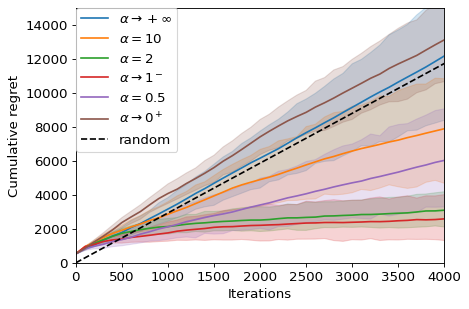

In [16]:
alphas = ['1000000000', '10', '2', '0.99999', '0.5', '1e-06']

matplotlib.rcParams['figure.figsize'] = [8.0, 6.0]
matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['savefig.dpi'] = 100
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['legend.fontsize'] = 'medium'
matplotlib.rcParams['figure.titlesize'] = 'medium'
colors = itertools.cycle(["b", "b", "g", "b", "b"])

f, ax = plt.subplots(1, 1, figsize=(6,4))
s = df1.droplevel('LogValue', axis=1)\
        .droplevel('Run', axis=1)\
        .set_index(np.arange(100)*100)
sns.lineplot(data=s*100, ax=ax, dashes=None, hue='alpha', ci=95,
             hue_order=alphas, color=next(colors), legend=False)
sns.lineplot([0,4000],[0,4000*2.93*1], color='black')
ax.lines[6].set_linestyle("--")
ax.set_xlim([0,4000])
ax.set_ylim([0,15000])
ax.set(xlabel='Iterations', ylabel='Cumulative regret')
ax.grid(False)
plt.legend([r'$\alpha \rightarrow +\infty$', r'$\alpha = 10$', r'$\alpha = 2$', r'$\alpha \rightarrow 1^-$',
            r'$\alpha = 0.5$', r'$\alpha \rightarrow 0^+$', 'random'], loc=2, borderaxespad=0.)

f.tight_layout(pad=1.0)
#f.savefig('mab_regret_95.pdf', bbox_inches='tight', pad_inches=0)

In [6]:
df = pd.read_hdf('data_sharpe.h5')
df2 = df.transpose()
#df = df.cumsum()
df2

Run,chocolate-sweep-120,jumping-sweep-119,pleasant-sweep-118,still-sweep-117,volcanic-sweep-116,dashing-sweep-115,vocal-sweep-114,dainty-sweep-113,lunar-sweep-112,fanciful-sweep-111,...,wobbly-sweep-10,graceful-sweep-6,comic-sweep-4,twilight-sweep-8,worldly-sweep-7,genial-sweep-1,celestial-sweep-2,logical-sweep-5,silver-sweep-9,vibrant-sweep-3
alpha,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,...,1e-06,1e-06,1e-06,1e-06,1e-06,1e-06,1e-06,1e-06,1e-06,1e-06
LogValue,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,...,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval,sharpe_eval
1,0.979943,0.893196,0.931627,0.962717,0.984975,0.961099,0.956200,0.945272,0.932744,0.880706,...,0.939613,0.917021,0.932310,0.940551,0.912952,0.897730,0.975578,0.985228,0.939860,0.960489
2,1.722016,4.942248,2.045133,6.191062,2.295340,6.365164,1.941421,0.895648,2.405285,1.792905,...,5.822370,1.696378,1.104960,1.834015,4.911334,5.829623,1.878462,2.005300,1.899385,2.170022
3,5.946801,0.919840,2.343438,5.931265,1.789903,1.878009,6.593819,6.620807,5.048908,2.227202,...,1.578481,1.824430,1.269961,1.781207,1.820066,2.468796,0.840882,2.041311,0.999409,1.901975
4,1.071583,1.488947,6.130647,5.780835,1.834683,1.859850,1.849724,5.366247,5.815341,1.916189,...,1.788801,1.754664,1.929615,1.715084,6.753003,6.076758,1.540521,1.827210,1.794915,1.907056
5,0.787247,2.520526,5.908827,7.799704,1.828269,2.062699,6.059270,5.651039,6.343603,2.203997,...,1.770072,1.776435,1.809217,1.635008,1.922957,6.153579,0.996689,1.668283,2.013189,1.825157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.890512,6.680125,0.861684,1.377009,2.007015,4.973763,1.303940,6.489663,7.195834,1.599318,...,1.837587,1.663856,6.427298,1.773207,1.743914,1.707667,6.425089,1.843720,1.676569,3.952089
97,1.420453,4.867900,0.953555,1.484442,1.202530,5.308255,0.930811,5.198839,5.572905,0.915778,...,1.008167,1.700926,5.523867,1.684965,1.717153,1.980022,5.536784,1.792732,1.780810,1.813031


In [7]:
idx = df2.columns
alphas = idx.get_level_values(level='alpha').unique()
alphas

Index(['1000000000', '10', '2', '0.99999', '0.5', '1e-06'], dtype='object', name='alpha')

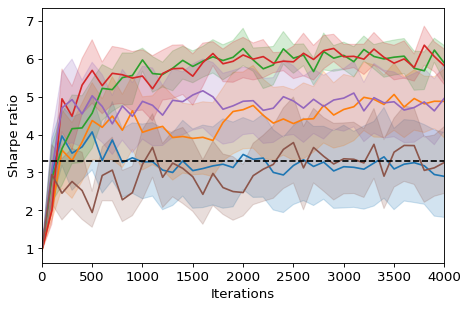

In [16]:
alphas = ['1000000000', '10', '2', '0.99999', '0.5', '1e-06']

matplotlib.rcParams['figure.figsize'] = [8.0, 6.0]
matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['savefig.dpi'] = 100
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['legend.fontsize'] = 'medium'
matplotlib.rcParams['figure.titlesize'] = 'medium'
colors = itertools.cycle(["b", "b", "g", "b", "b"])

f, ax = plt.subplots(1, 1, figsize=(6,4))
s = df2.droplevel('LogValue', axis=1)\
        .droplevel('Run', axis=1)\
        .set_index(np.arange(100)*100)
sns.lineplot(data=s, ax=ax, dashes=None, hue='alpha', ci=95,
             hue_order=alphas, color=next(colors), legend=False)
sns.lineplot([0,10000],[3.3,3.3], color='black')
ax.lines[6].set_linestyle("--")
ax.set_xlim([0,4000])
#ax.set_ylim([0,200])
ax.set(xlabel='Iterations', ylabel='Sharpe ratio')
ax.grid(False)
#plt.legend([r'$\alpha \rightarrow +\infty$', r'$\alpha = 10$', r'$\alpha = 2$', r'$\alpha \rightarrow 1^-$',
#            r'$\alpha = 0.5$', r'$\alpha \rightarrow 0^+$', 'random'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

f.tight_layout(pad=1.0)
f.savefig('mab_sharpe_95.pdf', bbox_inches='tight', pad_inches=0)

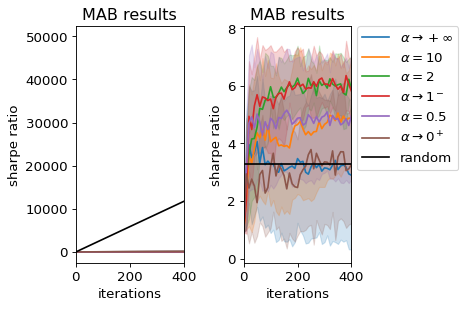

In [9]:
f, ax = plt.subplots(1, 2, figsize=(6,4))
s1 = df1.droplevel('LogValue', axis=1)\
        .droplevel('Run', axis=1)\
        .set_index(np.arange(100)*10)
sns.lineplot(data=s1, ax=ax[0], dashes=None, hue='alpha', ci='sd',
             hue_order=alphas, color=next(colors), legend=False)
sns.lineplot([0,1700],[0,1700*2.93*10], ax=ax[0], color='black')

s2 = df2.droplevel('LogValue', axis=1)\
        .droplevel('Run', axis=1)\
        .set_index(np.arange(100)*10)
sns.lineplot(data=s2, ax=ax[1], dashes=None, hue='alpha', ci='sd',
             hue_order=alphas, color=next(colors), legend=False)
sns.lineplot([0,10000],[3.3,3.3], ax=ax[1], color='black')


#ax[0].lines[6].set_linestyle("--")
ax[0].set_xlim([0,400])
#ax.set_ylim([0,200])
ax[0].set(xlabel='iterations', ylabel='sharpe ratio', title='MAB results')
ax[0].grid(False)
#ax[1].lines[6].set_linestyle("--")
ax[1].set_xlim([0,400])
#ax.set_ylim([0,200])
ax[1].set(xlabel='iterations', ylabel='sharpe ratio', title='MAB results')
ax[1].grid(False)
plt.legend([r'$\alpha \rightarrow +\infty$', r'$\alpha = 10$', r'$\alpha = 2$', r'$\alpha \rightarrow 1^-$',
            r'$\alpha = 0.5$', r'$\alpha \rightarrow 0^+$', 'random'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

f.tight_layout(pad=1.0)